In [1]:
!git clone https://github.com/deepak2233/Traffic-Signs-Recognition-using-CNN-Keras.git

Cloning into 'Traffic-Signs-Recognition-using-CNN-Keras'...
remote: Enumerating objects: 52029, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 52029 (delta 25), reused 71 (delta 25), pack-reused 51958 (from 1)
Receiving objects: 100% (52029/52029), 386.47 MiB | 32.52 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (103856/103856), done.


In [ ]:
ls

drive/  sample_data/  Traffic-Signs-Recognition-using-CNN-Keras/


#Loading Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

#Loading Data

In [3]:
test= "/content/Traffic-Signs-Recognition-using-CNN-Keras/data/test"
train = "/content/Traffic-Signs-Recognition-using-CNN-Keras/data/train"

In [4]:
import shutil

# Compress the train folder
shutil.make_archive('/content/train_data', 'zip', '/content/Traffic-Signs-Recognition-using-CNN-Keras/data/train')

# Compress the test folder
shutil.make_archive('/content/test_data', 'zip', '/content/Traffic-Signs-Recognition-using-CNN-Keras/data/test')


'/content/test_data.zip'

In [5]:
from google.colab import files

# Download the train_data.zip
files.download('/content/train_data.zip')

# Download the test_data.zip
files.download('/content/test_data.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Ploting Sample Images

In [ ]:
def load_data(train_path):
    images = []
    labels = []
    classes = os.listdir(train_path)
    for class_id in classes:
        class_dir = os.path.join(train_path, class_id)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (32, 32))  # Resize to 32x32
                images.append(img)
                labels.append(int(class_id))
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load the data
X, y = load_data(train)

# Normalize pixel values
X = X / 255.0

# One-hot encode the labels
y = to_categorical(y, num_classes=len(np.unique(y)))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [ ]:
num_classes = 43 #  this is number of classes in GTSRB dataset
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with num_classes units
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,067 (1.38 MB)

 Trainable params: 361,067 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - accuracy: 0.1800 - loss: 3.3018 - val_accuracy: 0.5662 - val_loss: 1.5321
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - accuracy: 0.4773 - loss: 1.7869 - val_accuracy: 0.7669 - val_loss: 0.9393
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6342 - loss: 1.3334 - val_accuracy: 0.8454 - val_loss: 0.6981
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.7168 - loss: 1.0926 - val_accuracy: 0.9037 - val_loss: 0.5526
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.7704 - loss: 0.9411 - val_accuracy: 0.9229 - val_loss: 0.4778
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.8083 - loss: 0.8257 - val_accuracy: 0.9444 - val_loss: 0.4245
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8270 - loss: 0.7721 - val_accuracy: 0.9556 - val_loss: 0.4094
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8507 - loss: 0.7146 - val_accurac

Validation Accuracy: 98.65%


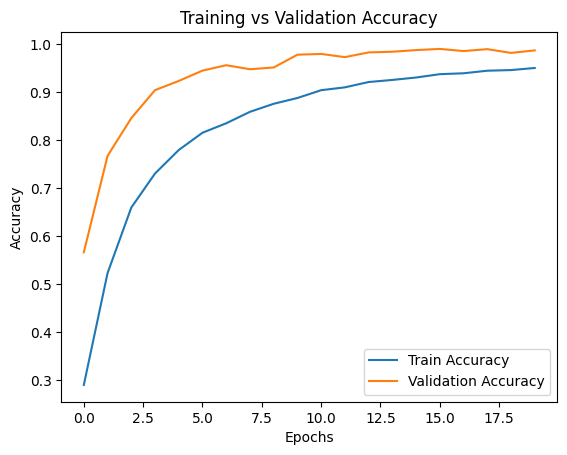

In [ ]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [ ]:
model.save("gtsrb_traffic_sign_model.h5")